# Shelter Animal Outcomes 1

## Data visualization 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [4]:
df['AnimalType'].unique()

array(['Dog', 'Cat'], dtype=object)

In [17]:
df.groupby(['AnimalType']).get_group('Cat').shape[0]

11134

In [16]:
df.groupby(['AnimalType']).get_group('Dog').shape[0]

15595

In [5]:
df['OutcomeType'].unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'], dtype=object)

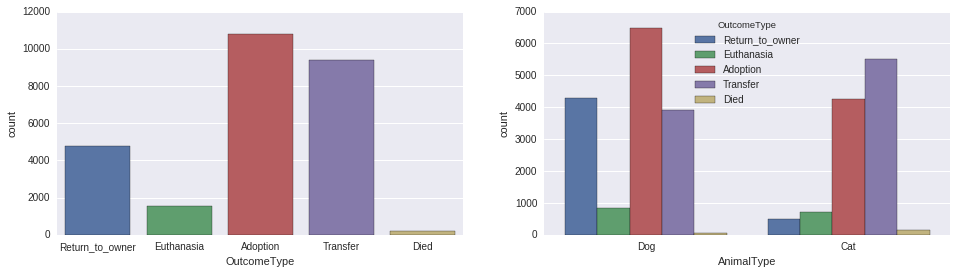

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(x="OutcomeType", data=df,  ax=ax1)
sns.countplot(x="AnimalType", hue="OutcomeType", data=df,  ax=ax2)

Overall it seems not many animals died of natural causes. 

Doesn't seem like cats have nine lives unfortunately.
Probably because of their shitty attitude and general evilness they are likely to get transferred.
Dogs have tricked their masters with their sad puppy face to get returned more. Also they are told to be more loyal.

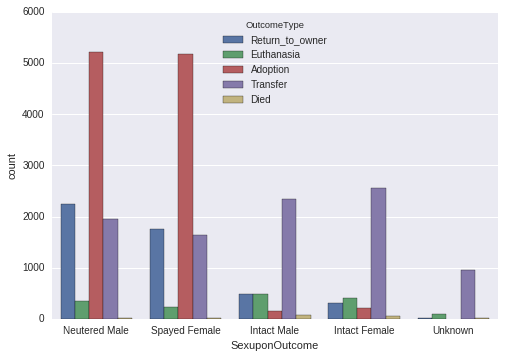

In [7]:
sns.countplot(x="SexuponOutcome", hue="OutcomeType", data=df)

Overall sex likely does not play a big role in outcome, but spayed/neutered population is bigger they are more likely to get adopted

In [8]:
dfCat = df.groupby(['AnimalType']).get_group('Cat')
dfDog = df.groupby(['AnimalType']).get_group('Dog')

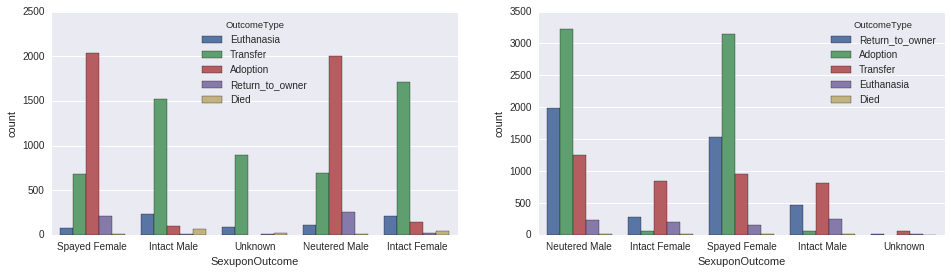

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(x="SexuponOutcome", hue="OutcomeType", data=dfCat, ax=ax1)
sns.countplot(x="SexuponOutcome", hue="OutcomeType", data=dfDog, ax=ax2)

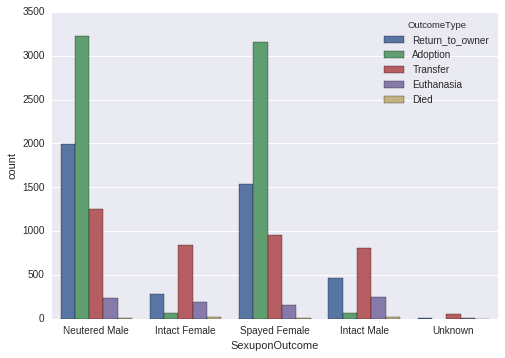

Cats and dogs have different probability distributions for outcome 

In [10]:
dfCat['Color'].describe()

count           11134
unique            146
top       Brown Tabby
freq             1635
Name: Color, dtype: object

In [11]:
dfDog['Color'].describe()

count           15595
unique            262
top       Black/White
freq             1730
Name: Color, dtype: object

As expected there are too many colors that makes it difficult to properly visualize without discarding a majority of colors. Thinking a bit, it makes more sense to have a combination of both color and breed to make a pet to be more appealing/attractive. 

In [12]:
df['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years', nan,
       '17 years', '18 years', '19 years', '20 years'], dtype=object)

As expected there are animals over a wide spectrum of ages. Age should play a major role deciding the outcome.

In [13]:
df['NameIsPresent'] = df['Name'].isnull()

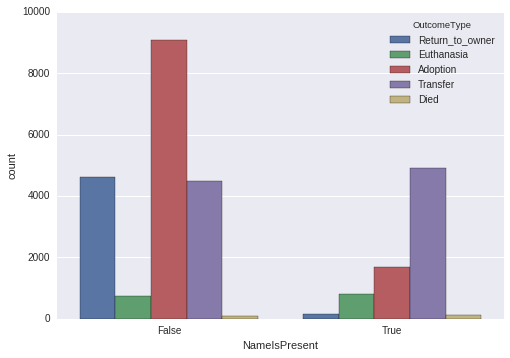

In [14]:
sns.countplot(x="NameIsPresent", hue="OutcomeType", data=df)

Animals that didn't have names or their names were lost, as is evident from the graph above, that their outcome probability distribution would be very different. Named animals seem to be more popular for adoption. Named animals could mean that they had previous owners and possible stories. 

In [15]:
df[df['NameIsPresent'] == True].shape[0]

7691

In [16]:
df[df['NameIsPresent'] == False].shape[0]

19038

We can see that out of the animals present in training set more than 2/3 had names and roughly about half of them got adopted. 

In [19]:
df['OutcomeSubtype'].unique()

array([nan, 'Suffering', 'Foster', 'Partner', 'Offsite', 'SCRP',
       'Aggressive', 'Behavior', 'Rabies Risk', 'Medical', 'In Kennel',
       'In Foster', 'Barn', 'Court/Investigation', 'Enroute', 'At Vet',
       'In Surgery'], dtype=object)

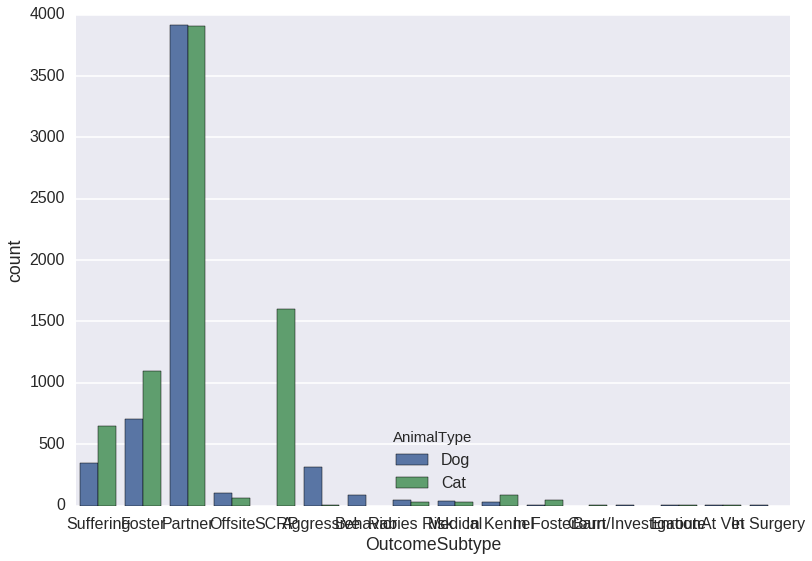

In [18]:
sns.set_context("poster")
sns.countplot(x="OutcomeSubtype", hue="AnimalType", data=df)